<a href="https://colab.research.google.com/github/Areliortiz/SIMULACION2/blob/main/Sismos_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
sismos7 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQwIELBKwwZD91Ib1_96POm_i8kG9uJhpEoXAfHzZWy4PifaD_0nJv4tMxcARMSqA/pub?output=csv')

In [59]:
sismos7

,Magnitud,Fecha UTC,Hora UTC
0,7.4,1/19/1900,6:33:30
1,7.5,4/19/1902,2:23:00
2,7.7,9/23/1902,20:18:00
3,7.1,12/12/1902,23:10:00
4,7.6,1/14/1903,1:47:36
...,...,...,...
63,7.1,9/19/2017,18:14:39
64,7.2,2/16/2018,23:39:39
65,7.4,6/23/2020,15:29:03
66,7.1,9/8/2021,1:47:46


In [60]:
sismos7['fecha_hora'] = pd.to_datetime(sismos7['Fecha UTC'] + ' ' + sismos7['Hora UTC'])

# Calcula los tiempos de interllegada
sismos7['tiempo_interllegada'] = sismos7['fecha_hora'].diff()

# Convierte los tiempos de interllegada a días
sismos7['tiempo_interllegada_dias'] = sismos7['tiempo_interllegada'].dt.total_seconds() / (24 * 3600)

# Acumula los tiempos de interllegada
sismos7['tiempo_acumulado'] = sismos7['tiempo_interllegada_dias'].cumsum()

print(sismos7[['fecha_hora', 'tiempo_interllegada_dias']])

            fecha_hora  tiempo_interllegada_dias
0  1900-01-19 06:33:30                       NaN
1  1902-04-19 02:23:00                819.826042
2  1902-09-23 20:18:00                157.746528
3  1902-12-12 23:10:00                 80.119444
4  1903-01-14 01:47:36                 32.109444
..                 ...                       ...
63 2017-09-19 18:14:39                 11.559282
64 2018-02-16 23:39:39                150.225694
65 2020-06-23 15:29:03                857.659306
66 2021-09-08 01:47:46                441.429664
67 2022-09-19 18:05:09                376.678738

[68 rows x 2 columns]


In [61]:
#ordena de mayor a menor
tiempo=sismos7.sort_values(by='tiempo_interllegada_dias', ascending=False)


In [62]:
#elige solo la columna de tiempo_interllegada_dias
tiempo_interllegada = tiempo['tiempo_interllegada_dias']
print(tiempo_interllegada)


50    2911.733137
58    2629.857037
16    2602.829699
34    2417.766898
32    2308.343356
         ...     
22      14.982847
63      11.559282
53      11.460463
49       1.513484
0             NaN
Name: tiempo_interllegada_dias, Length: 68, dtype: float64


In [63]:
# Suponiendo que tiempo_acumulado es una serie de Pandas
#cambia de serie a lista
tiempo_interllegada_lista = tiempo_interllegada.tolist()
print(tiempo_interllegada_lista)

[2911.7331365740743, 2629.857037037037, 2602.829699074074, 2417.7668981481484, 2308.3433564814814, 1977.2930092592592, 1748.2304050925925, 1238.5985648148148, 1209.3995486111112, 1188.288773148148, 1074.7642939814814, 1068.152361111111, 1029.4521296296296, 1007.291412037037, 991.8352662037037, 926.3566550925926, 889.9660300925926, 877.6379976851852, 857.6593055555555, 834.2270833333333, 827.9510648148148, 819.8260416666667, 786.715462962963, 733.7858333333334, 715.8070138888888, 677.0075, 634.9964930555556, 590.1571875, 589.2374537037037, 526.910775462963, 526.0274305555556, 505.36541666666665, 491.9431597222222, 490.49194444444447, 478.1855092592593, 441.42966435185184, 413.51653935185186, 376.6787384259259, 369.368125, 365.5199074074074, 348.1385648148148, 331.6063657407407, 321.72230324074076, 237.12480324074073, 231.9396064814815, 209.53436342592593, 199.4053935185185, 192.3413888888889, 184.3675, 162.33763888888888, 157.74652777777777, 150.39635416666667, 150.22569444444446, 127.0

In [64]:
#Genera lista de interllegado(eje x)
interllegada_lista = []
for iterllegadas in tiempo_interllegada_lista[:-1]:
  interllegada_lista.append(iterllegadas)

#interllegadas sin NaN
#print(interllegada_lista)


In [67]:
n = 67  # n=numero de interllegafdas
estimador_insesgado = np.linspace(1/(n+1), n/(n+1), n)
print(estimador_insesgado)

[0.01470588 0.02941176 0.04411765 0.05882353 0.07352941 0.08823529
 0.10294118 0.11764706 0.13235294 0.14705882 0.16176471 0.17647059
 0.19117647 0.20588235 0.22058824 0.23529412 0.25       0.26470588
 0.27941176 0.29411765 0.30882353 0.32352941 0.33823529 0.35294118
 0.36764706 0.38235294 0.39705882 0.41176471 0.42647059 0.44117647
 0.45588235 0.47058824 0.48529412 0.5        0.51470588 0.52941176
 0.54411765 0.55882353 0.57352941 0.58823529 0.60294118 0.61764706
 0.63235294 0.64705882 0.66176471 0.67647059 0.69117647 0.70588235
 0.72058824 0.73529412 0.75       0.76470588 0.77941176 0.79411765
 0.80882353 0.82352941 0.83823529 0.85294118 0.86764706 0.88235294
 0.89705882 0.91176471 0.92647059 0.94117647 0.95588235 0.97058824
 0.98529412]


semilog (x,y),  

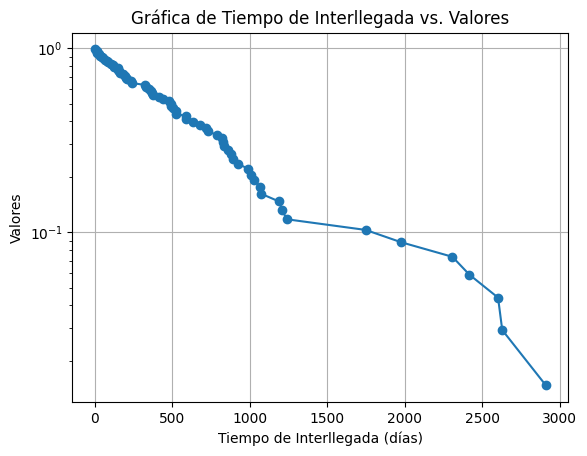

In [69]:
# Grafica los datos
#interllegada_lista debe ser igual a estimador_insesgado
plt.semilogy(interllegada_lista,estimador_insesgado, marker='o', linestyle='-')
plt.xlabel('Tiempo de Interllegada (días)')
plt.ylabel('Valores')
plt.title('Gráfica de Tiempo de Interllegada vs. Valores')
plt.grid(True)
plt.show()